In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)


c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Filter for Job titles and Country
df_IND =  df[(df['job_country'] =='India')].dropna(subset=['salary_year_avg'])

In [ ]:
job_titles = df_IND['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [7]:
df_IN_top6 = df_IND[df['job_title_short'].isin(job_titles)]

C:\Users\DeLL\AppData\Local\Temp\ipykernel_17612\1263445417.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_IN_top6 = df_IND[df['job_title_short'].isin(job_titles)]


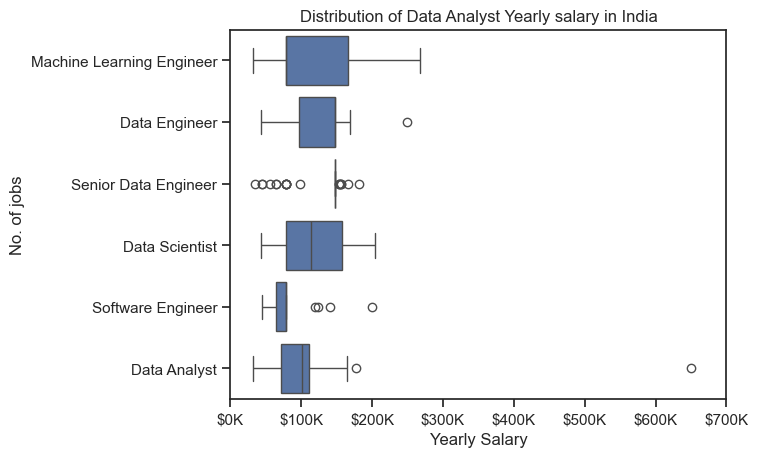

In [15]:
sns.boxplot(data=df_IN_top6, x='salary_year_avg', y='job_title_short')
plt.title('Distribution of Data Analyst Yearly salary in India')
plt.xlabel('Yearly Salary')
plt.ylabel('No. of jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos : f"${int(y/1000)}K"))
plt.xlim(0,700000)
plt.show()

In [19]:
job_order = df_IN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

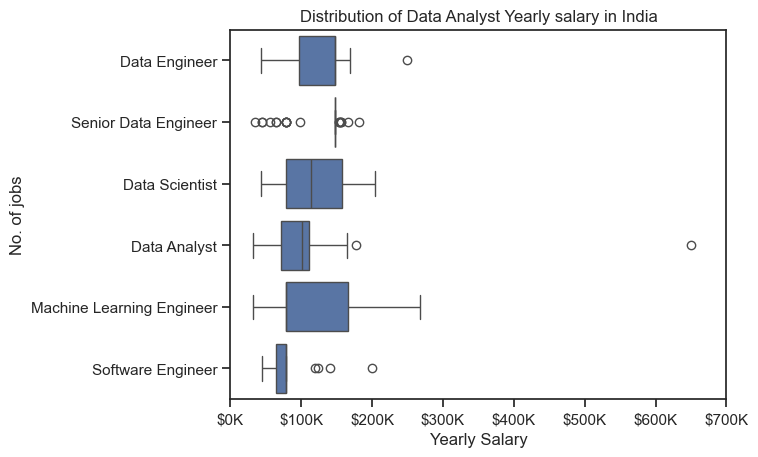

In [20]:
sns.boxplot(data=df_IN_top6, x='salary_year_avg', y='job_title_short',order=job_order)
plt.title('Distribution of Data Analyst Yearly salary in India')
plt.xlabel('Yearly Salary')
plt.ylabel('No. of jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y , pos : f"${int(y/1000)}K"))
plt.xlim(0,700000)
plt.show()

In [37]:
df_DA_Ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_Ind = df_DA_Ind.dropna(subset=['salary_year_avg'])

In [38]:
df_DA_Ind = df_DA_Ind.explode('job_skills')

In [48]:
df_DA_Ind_top_pay = df_DA_Ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_Ind_top_pay = df_DA_Ind_top_pay.head(10)
df_DA_Ind_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [45]:
df_DA_skills = df_DA_Ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


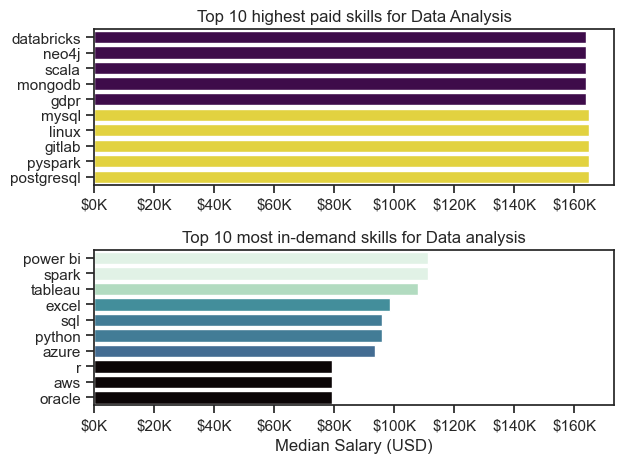

In [47]:
# Top 10 highest paid skills fro data analyst
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')


#df_DA_top_pay[::-1].plot(kind='barh',y='median', ax=ax[0],legend = False)
sns.barplot(data=df_DA_Ind_top_pay, x='median', y=df_DA_Ind_top_pay.index, ax=ax[0], hue='median', palette='viridis')
ax[0].legend().remove()


ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))

#Top 10 Most In-Demand Skills for Data Analyst
#df_DA_skills[::-1].plot(kind='barh',y='median', ax=ax[1],legend = False)
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1],hue='median',palette = 'mako')
ax[1].legend().remove()


ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in-demand skills for Data analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))

plt.tight_layout()
plt.show()